### Page Rank Algorithm

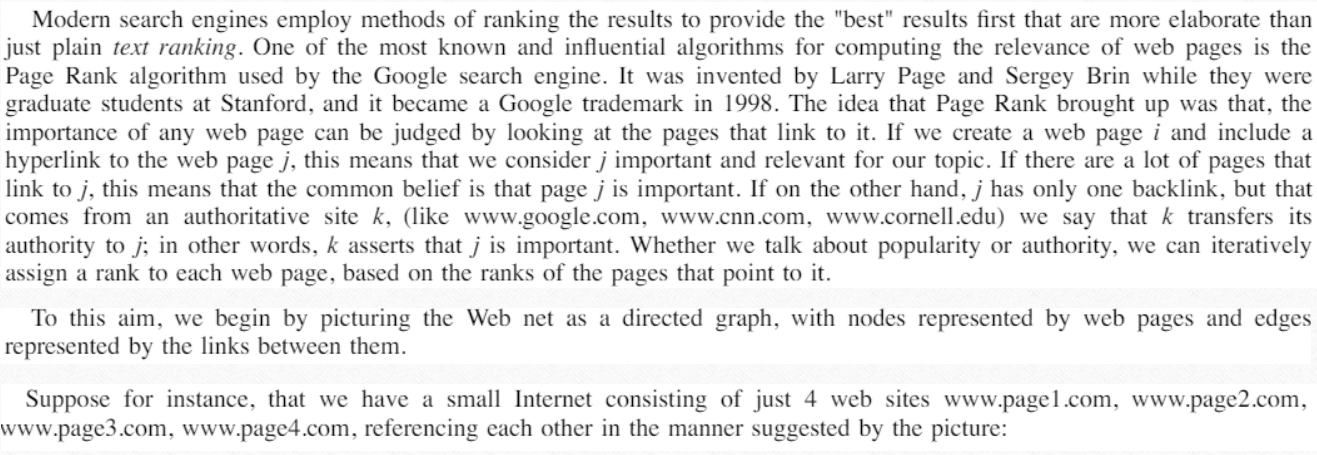


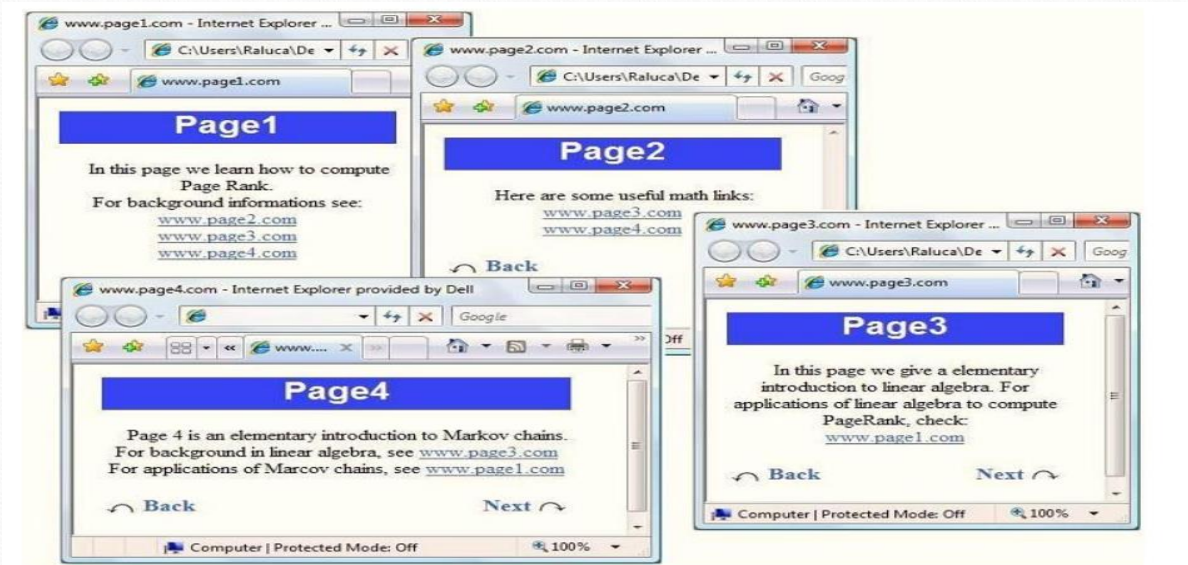

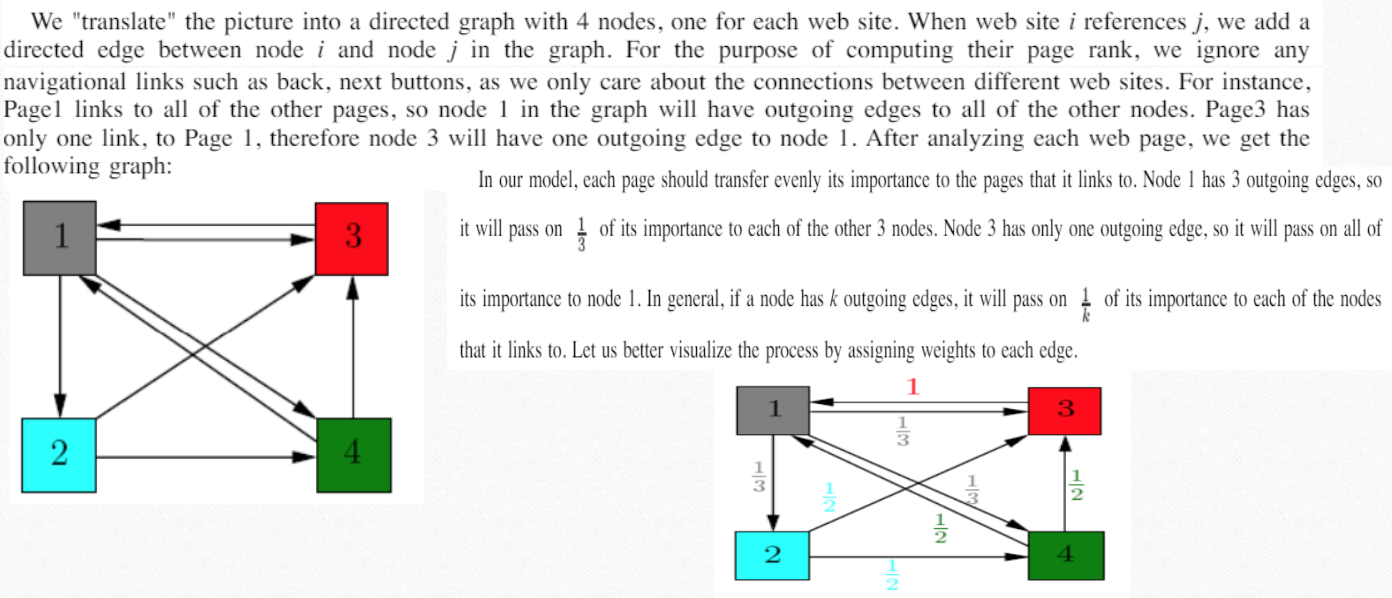

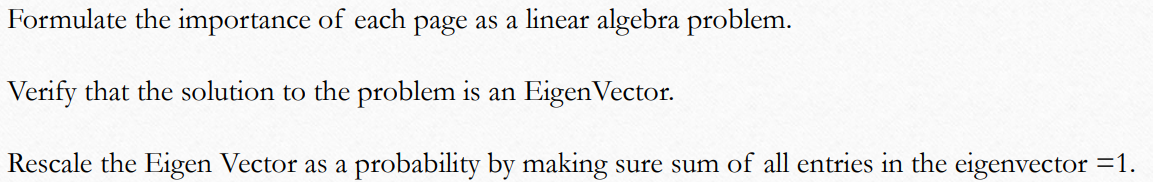

#### Solution Approach:
    
    Input: The list of pages for which there exists an outlink from each page in the network.
    Aim 1: Get the transition matrix from the outlinks information
    Aim 2: To formulate the importance of each page as a linear algebra porblem
    Aim 3: To verify that the solution to the problem is an eigen vector

Page_links  -  An input matrix containing the information about outlinks from each page

In [83]:
page_links = [
    [2, 3, 4],
    [3, 4],
    [1],
    [1, 3]
]

Function to design the transition matrix from the outlink information of the pages.

In [84]:
import numpy as np
def transition_matrix(page_links):
    num_pages = len(page_links)
    trans_matrix = np.zeros((num_pages, num_pages))
    for i, links in enumerate(page_links):
        no_links = len(links)
        for link in links:
            trans_matrix[link-1, i] = 1/no_links
    return trans_matrix

In [85]:
transition_matrix = transition_matrix(page_links)

In [86]:
transition_matrix

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [87]:
# Representing each row of the transition matrix as equations
for i, row in enumerate(transition_matrix):
    x1, x2, x3, x4 = row
    print(f"x{i+1} = {x1:.2f}x1 + {x2:.2f}x2 + {x3:.2f}x3 + {x4:.2f}x4")

x1 = 0.00x1 + 0.00x2 + 1.00x3 + 0.50x4
x2 = 0.33x1 + 0.00x2 + 0.00x3 + 0.00x4
x3 = 0.33x1 + 0.50x2 + 0.00x3 + 0.50x4
x4 = 0.33x1 + 0.50x2 + 0.00x3 + 0.00x4


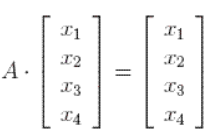

From the above representation, the given problem can be formulated as linear algebra problem with the help of equation A.v = λ.v

A - Transition matrix

v = x1, x2, x3, x4 - Eigen_vectors representing importance of each page in the network

λ - Eigen value, whichin this case must be 1.

Hence finding the eigen vectors and the Eigen values of the transiotn matrix will help to mark the importance of each page in the network.

In [88]:
def eigen_values_vectors(matrix):
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    real_eigen_values = np.real(eigen_values)
    eigen_vector_matrix = np.column_stack(np.real(eigen_vectors))
    return real_eigen_values, eigen_vector_matrix

In [89]:
eigen_values, eigen_vectors = eigen_values_vectors(transition_matrix)

In the formulated problem, the eigen value should be one to satisfy the equation. So let's check if ther exists 1 in the eigen value list and if it exists, pick the eigen_vectors corresponding to that eigen value.

In [90]:
def pick_eigen_vector(eigen_values, eigen_vectors):
    eigen_values = eigen_values.astype(int)
    if 1 in eigen_values:
        idx = np.where(eigen_values == 1)[0]
        print(idx)
    else:
        return None
    return eigen_vectors[idx]

In [91]:
eigen_vector = pick_eigen_vector(eigen_values, eigen_vectors)

[0]


In [92]:
eigen_vector

array([[0.72101012, 0.24033671, 0.54075759, 0.36050506]])

Hence there exists a eigen value with value 1 and its corresponding eigen vector represents the page rank of the given problem.

Below we scale the eigen vector and represent the rank of each pages in the network

In [93]:
def scale(eigen_vector):
    return eigen_vector/np.sum(eigen_vector)

In [94]:
eigen_vector_scaled = scale(eigen_vector)[0]

In [95]:
num_pages = len(page_links)
for i in range(num_pages):
    print(f"Rank of Page{i+1}: {eigen_vector_scaled[i]:.2f}")

Rank of Page1: 0.39
Rank of Page2: 0.13
Rank of Page3: 0.29
Rank of Page4: 0.19
